In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
%matplotlib inline

In [2]:
#importamos base de datos sociológicos 
data=pd.read_excel('anuario_2019.xlsx', sheet_name="2.3 Determinantes Sociológicos", usecols="A,B",header=None).dropna()
#importamos base de datos económicos
data2=pd.read_excel('anuario_2019.xlsx', sheet_name="Respecto del viaje", usecols="A,B",header=None).dropna()


En la base de datos vienen las probabilidades de cada variable, por lo que no es necesario que las modifiquemos. 

In [3]:
#segmentamos la base de datos para generar variables 
#nodo 1: EDAD
nac_edad=pd.DataFrame(data.iloc[8:14])
nac_edad.columns=(["edades","probabilidad"])

int_edad=pd.DataFrame(data.iloc[15:21])
int_edad.columns=(["edades","probabilidad"])

#nodo 2: ESTADO CIVIL
nac_civil=pd.DataFrame(data.iloc[22:27])
nac_civil.columns=(["estado_civil","probabilidad"])

int_civil=pd.DataFrame(data.iloc[28:33])
int_civil.columns=(["estado_civil","probabilidad"])

#nodo 3: NIVEL DE ESCOLARIDAD
nac_school=pd.DataFrame(data.iloc[34:40])
nac_school.columns=(["nivel_escolar","probabilidad"])

int_school=pd.DataFrame(data.iloc[41:47])
int_school.columns=(["nivel_escolar","probabilidad"])

# nodo 4: MOTIVACIÓN PARA HACER EL VIAJE
nac_motiv=pd.DataFrame(data2.iloc[13:20])
nac_motiv.columns=(["motivacion","probabilidad"])

int_motiv=pd.DataFrame(data2.iloc[22:30])
int_motiv.columns=(["motivacion","probabilidad"])

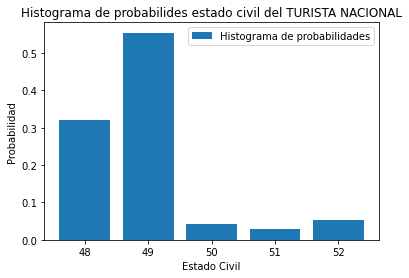

In [145]:
plt.bar(nac_civil.index,nac_civil.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA NACIONAL')
plt.legend()
plt.show()

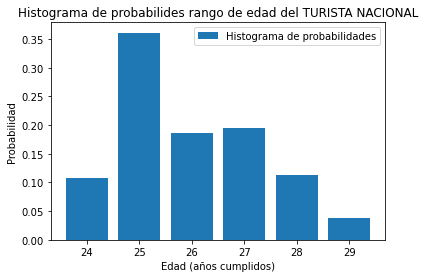

In [146]:
plt.bar(nac_edad.index,nac_edad.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Edad (años cumplidos)')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides rango de edad del TURISTA NACIONAL')
plt.legend()
plt.show()

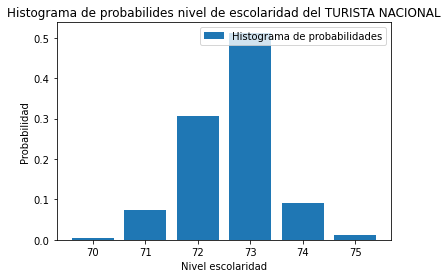

In [147]:
plt.bar(nac_school.index,nac_school.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Nivel escolaridad')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides nivel de escolaridad del TURISTA NACIONAL')
plt.legend()
plt.show()

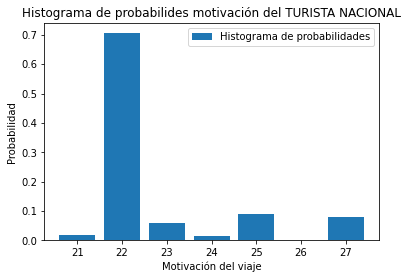

In [148]:
plt.bar(nac_motiv.index,nac_motiv.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Motivación del viaje')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides motivación del TURISTA NACIONAL')
plt.legend()
plt.show()

In [55]:
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [56]:
best_fit_distribution(nac_edad)

('norm', (0.0, 1.0))

In [57]:
best_fit_distribution(int_edad)

('norm', (0.0, 1.0))

In [59]:
best_fit_distribution(nac_civil)

('norm', (0.0, 1.0))

In [58]:
best_fit_distribution(int_civil)

('norm', (0.0, 1.0))

## Kernel Density Estimation

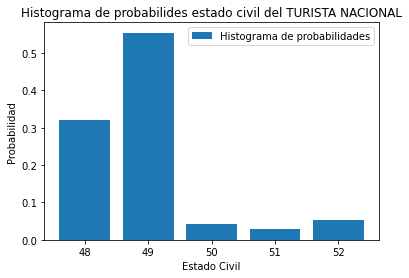

In [4]:
#primero obtenemos el histograma de probabilidades donde la segmentación esta representada por datos numéricos
plt.bar(nac_civil.index,nac_civil.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA NACIONAL')
plt.legend()
plt.show()

In [4]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.neighbors import KernelDensity

def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

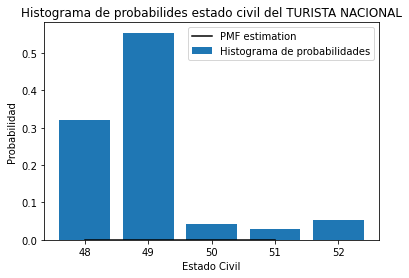

In [13]:
x=np.array(nac_civil.probabilidad,dtype=np.float64)
x_grid=np.arange(48,52)
model=KernelDensity(bandwidth=0.1)
model.fit(x[:,None])
pmf_x=np.exp(model.score_samples(x_grid[:,None]))

plt.bar(nac_civil.index,nac_civil.probabilidad, label='Histograma de probabilidades')
plt.plot(x_grid,pmf_x,label="PMF estimation",color='k')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA NACIONAL')
plt.legend()
plt.show()

KernelDensity(bandwidth=0.5)

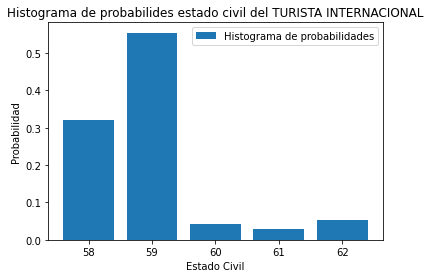

In [59]:
#primero obtenemos el histograma de probabilidades donde la segmentación esta representada por datos numéricos
plt.bar(int_civil.index,nac_civil.probabilidad, label='Histograma de probabilidades')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA INTERNACIONAL')
plt.legend()
plt.show()

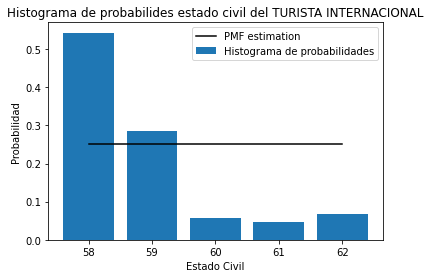

In [62]:
x=np.array(int_civil.probabilidad,dtype=np.float64)
x_grid=np.linspace(58,62)
pmf_x=kde_statsmodels_m(x,x_grid ,bandwidth=0.2)
plt.bar(int_civil.index,int_civil.probabilidad, label='Histograma de probabilidades')
plt.plot(x_grid,pmf_x,label="PMF estimation",color='k')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA INTERNACIONAL')
plt.legend()
plt.show()